In [216]:
import numpy as np
import math
import pandas as pd
import seaborn as sns

# Задача 1

Даны значения зарплат из выборки выпускников:

$100$, $80$, $75$, $77$, $89$, $33$, $45$, $25$, $65$, $17$, $30$, $230$, $24$, $57$, $55$, $70$, $75$, $65$, $84$, $90$, $150$

Своими руками (т.е. без использования статистических функций вроде *mean*, *std*, *var*) посчитать среднее арифметическое, смещённую и несмещённую оценки дисперсии, среднее квадратичное отклонение для данной выборки.

Можно затем посчитать те же значения с использованием статистических функций, чтобы проверить себя.

In [253]:
sal = np.array([100 , 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 230, 24, 57, 55, 70, 75, 65, 84, 90, 150, 100])
m = len(sal)

x_ = np.sum(sal)/m

d_2 = np.sum((sal-x_)**2)/m
d_unbiased_2 = np.sum((sal-x_)**2)/(m-1)

d = np.sqrt(d_2)
d_unbiased = np.sqrt(d_unbiased_2)

In [3]:
print('Среднее арифметическое - {} (проверка - {})'.format(x_, np.mean(sal)))
print('Смещенная дисперсия - {} (проверка - {})'.format(d_2, np.var(sal)))
print('Несмещенная дисперсия - {} (проверка - {})'.format(d_unbiased_2, np.var(sal, ddof=1)))
print('Смещенное среднее квадратичное отклонение - {} (проверка - {})'.format(d, np.std(sal)))
print('Несмещенное среднее квадратичное отклонение - {} (проверка - {})'.format(d_unbiased, np.std(sal, ddof=1)))

Среднее арифметическое - 74.36363636363636 (проверка - 74.36363636363636)
Смещенная дисперсия - 2069.3223140495866 (проверка - 2069.3223140495866)
Несмещенная дисперсия - 2167.8614718614717 (проверка - 2167.8614718614717)
Смещенное среднее квадратичное отклонение - 45.4898045066099 (проверка - 45.4898045066099)
Несмещенное среднее квадратичное отклонение - 46.56029931026509 (проверка - 46.56029931026509)


# Задача 2

Для выборки из задачи 1 найти (также без использования статистических функций) медиану, первый и третий квартили, интерквартильное расстояние. Найти выборсы в выборке, используя для этого "усы" из *boxplot*.

В этой задаче неоднозначности в вычислении квантилей можно разрешать любым способом.

In [257]:
print('Медиана по функции - ', np.median(sal))
print('Первый квартиль по функции - ', np.quantile(sal, q=0.25))
print('Третий квартиль по функции - ', np.quantile(sal, q=0.75))
print('Интерквартильное расстояние по функции - ', np.quantile(sal, [0.25, 0.75]))

Медиана по функции -  72.5
Первый квартиль по функции -  47.5
Третий квартиль по функции -  87.75
Интерквартильное расстояние по функции -  [47.5  87.75]


In [247]:
sal=sorted(sal)

med_low = math.ceil(len(sal)/2-0.5)
med_high = math.ceil(len(sal)/2+0.5)
med = sal[med_low:med_high:]
med = np.sum(med)/len(med)

ch_1 = (sal <= med).sum()/len(sal)
ch_2 = (sal >= med).sum()/len(sal)

print('Медиана без функции - ', med)
print('Процент зарплат не больше медианного значения - ', round(ch_1*100, 2))
print('Процент зарплат не меньше медианного значения - ', round(ch_2*100, 2))

Медиана без функции -  70.0
Процент зарплат не больше медианного значения -  52.38
Процент зарплат не меньше медианного значения -  52.38


In [248]:
quart_1_low = math.ceil(len(sal)/4-0.5)
quart_1_high = math.ceil(len(sal)/4+0.5)
quart_1 = sal[quart_1_low:quart_1_high:]
quart_1 = np.sum(quart_1)/len(quart_1)

ch_3 = (sal <= quart_1).sum()/len(sal)
ch_4 = (sal >= quart_1).sum()/len(sal)

print('Певый квартиль без функции - ', quart_1)
print('Процент зарплат не больше значения первого квартиля - ', round(ch_3*100, 2))
print('Процент зарплат не меньше значения первого квартиля - ', round(ch_4*100, 2))

Певый квартиль без функции -  45.0
Процент зарплат не больше значения первого квартиля -  28.57
Процент зарплат не меньше значения первого квартиля -  76.19


In [250]:
quart_3_low = math.ceil(math.ceil(len(sal)//2*3-0.5)//2-0.5)
quart_3_high = math.ceil(math.ceil(len(sal)//2*3+0.5)//2+0.5)
quart_3 = sal[quart_3_low:quart_3_high:]
quart_3 = np.sum(quart_3)/len(quart_3)

ch_5 = (sal <= quart_3).sum()/len(sal)
ch_6 = (sal >= quart_3).sum()/len(sal)

print('Третий квартиль без функции - ', quart_3)
print('Процент зарплат не больше значения третьего квартиля - ', round(ch_5*100, 2))
print('Процент зарплат не меньше значения третьего квартиля - ', round(ch_6*100, 2))

Третий квартиль без функции -  84.0
Процент зарплат не больше значения третьего квартиля -  76.19
Процент зарплат не меньше значения третьего квартиля -  28.57


In [252]:
inter_quart = np.array([quart_1,quart_3])

print('Интерквартильно расстояние без функции - ', inter_quart)

Интерквартильно расстояние без функции -  [45. 84.]


*Автоматизировать поиск медианы и квартилей так, чтобы они равнялись результатам, полученным с помощью функций, без нагромождения условий чот не получилось. Но я запускал бесконечный цикл с рандомными значениями от 0 до 1000 по 20, 22, 50, 100, 500 и проверку на "хотя бы", в ходе которой результаты функций ее не проходили, а вручную - все ок. Т.е. иногда  значения, например первого квартиля, разделяли на < 75% справа. Если добавить к исходному списку одно значение равное 100, то медиана через функцию будет 47,5 и тогда список делится на ~27 и ~73 процента. Как то так*

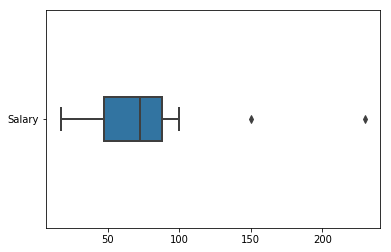

In [258]:
df = pd.DataFrame(sal, columns=['Salary'])
sns.boxplot(data=df,orient='h', width=0.2, linewidth=2)

*seabotn покрасивше*

# Задача 3

В университет на факультеты $A$ и $B$ поступило равное количество студентов, а на факультет $C$ студентов поступило столько же, сколько на $A$ и $B$ вместе. Вероятность того, что студент факультета $A$ сдаст первую сессию, равна $0.8$. Для студента факультета $B$ эта вероятность равна $0.7$, а для студента факультета $C - 0.9$. Студент сдал первую сессию. Какова вероятность, что он учится: a) на факультете $A$? б) на факультете $B$? в) на факультете $C$?

*Замечание: да, эта задача не на тему описательных статистик, но тема важная, и её стоит иногда освежать в памяти.*

In [259]:
P_a = 0.8
P_b = 0.7
P_c = 0.9
P_A = 1
P_B = P_a+P_b+P_c*2

P_BA_a=P_a/P_B
P_BA_b=P_b/P_B
P_BA_c=P_c*2/P_B

print('Вероятность что сессию сдал студент факультета A - ', round(P_BA_a*100, 2))
print('Вероятность что сессию сдал студент факультета B - ', round(P_BA_b*100, 2))
print('Вероятность что сессию сдал студент факультета C - ', round(P_BA_c*100, 2))


Вероятность что сессию сдал студент факультета A -  24.24
Вероятность что сессию сдал студент факультета B -  21.21
Вероятность что сессию сдал студент факультета C -  54.55
